In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('preprocessed.csv').drop(['Unnamed: 0'], axis=1)
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_ACTIVE_SOLD,CREDIT_ACTIVE_BAD_DEBT,CREDIT_DAY_OVERDUE,AVG_AMT_CREDIT_SUM,AMT_APPLICATION_APPROVED,AMT_APPLICATION_REFUSED,AMT_APPLICATION_CANCELED,AMT_APPLICATION_UNUSED,INCOME_LOAN_ANNUITY_PCT,AGE_BUCKET
0,1,Cash loans,M,N,Y,0,2.02,4.07,0.25,3.51,...,0.0,0.0,0.0,108131.945625,1.0,0.0,0.0,0.0,12.38,20-30
1,0,Cash loans,F,N,N,0,2.70,12.94,0.36,11.29,...,0.0,0.0,0.0,254350.125000,3.0,0.0,0.0,0.0,13.33,40-50
2,0,Revolving loans,M,Y,Y,0,0.68,1.35,0.07,1.35,...,0.0,0.0,0.0,94518.900000,1.0,0.0,0.0,0.0,10.29,50-60
3,0,Cash loans,F,N,Y,0,1.35,3.13,0.30,2.97,...,NaN,NaN,NaN,NaN,5.0,1.0,3.0,0.0,22.22,50-60
4,0,Cash loans,M,N,Y,0,1.22,5.13,0.22,5.13,...,0.0,0.0,0.0,146250.000000,6.0,0.0,0.0,0.0,18.03,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258056,0,Cash loans,F,N,Y,0,1.12,2.25,0.22,2.25,...,0.0,0.0,0.0,284142.973846,1.0,1.0,0.0,0.0,19.64,60-70
258057,0,Cash loans,M,N,N,0,1.57,2.55,0.28,2.25,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,17.83,20-30
258058,0,Cash loans,F,N,Y,0,0.72,2.70,0.12,2.25,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,16.67,50-60
258059,1,Cash loans,F,N,Y,0,1.71,3.70,0.20,3.19,...,0.0,0.0,0.0,45000.000000,2.0,0.0,0.0,0.0,11.70,30-40


In [28]:
# ##### 1)
# df = df.drop(['ORGANIZATION_TYPE'], axis=1)

# ##### 2)

# a = ['AMT_APPLICATION_APPROVED', 'AMT_APPLICATION_REFUSED', 'AMT_APPLICATION_CANCELED', 
#      'AMT_APPLICATION_UNUSED', 'CODE_GENDER', 'CREDIT_ACTIVE_CLOSED', 'CREDIT_ACTIVE_ACTIVE', 
#      'CREDIT_ACTIVE_SOLD', 'CREDIT_ACTIVE_BAD_DEBT', 'CREDIT_DAY_OVERDUE']

# for col in a:
#     df = df[df[col].notna()]
    
# df['AVG_AMT_CREDIT_SUM'].fillna(df['AVG_AMT_CREDIT_SUM'].mean(), inplace=True)

In [29]:
df.shape

(210843, 82)

In [30]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [31]:
# encoding categorical variables in order to use it in future models
for col in df.select_dtypes(include=['object']).columns:
    df[str(col)] = label_encoded(df[str(col)])

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['F' 'M']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['N' 'Y']
NAME_TYPE_SUITE ['Children' 'Family' 'Group of people' 'Other_A' 'Other_B'
 'Spouse, partner' 'Unaccompanied']
NAME_INCOME_TYPE ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Unemployed'
 'Working']
NAME_EDUCATION_TYPE ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']
OCCUPATION_TYPE ['Accountants' 'Cleaning staff' 'Cooking staff' 'Core staff' 'Drivers'
 'HR staff' 'High skill tech staff' 'IT staff' 'Laborers'
 'Low-skill Laborers' 'Managers' 'Medicine staff' 'Private service staff'
 'Realty agents' 'Sales staff' 'Secretaries' 'Security staff'
 'Waiters/barmen staff' 'u

In [32]:
X = df.drop(['TARGET'],axis=1).values
y = df['TARGET'].values

In [48]:
df[df['TARGET'] == 0]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_ACTIVE_SOLD,CREDIT_ACTIVE_BAD_DEBT,CREDIT_DAY_OVERDUE,AVG_AMT_CREDIT_SUM,AMT_APPLICATION_APPROVED,AMT_APPLICATION_REFUSED,AMT_APPLICATION_CANCELED,AMT_APPLICATION_UNUSED,INCOME_LOAN_ANNUITY_PCT,AGE_BUCKET
1,0,0,0,0,0,0,2.70,12.94,0.36,11.29,...,0.0,0.0,0.0,254350.125000,3.0,0.0,0.0,0.0,13.33,2
2,0,1,1,1,1,0,0.68,1.35,0.07,1.35,...,0.0,0.0,0.0,94518.900000,1.0,0.0,0.0,0.0,10.29,3
4,0,0,1,0,1,0,1.22,5.13,0.22,5.13,...,0.0,0.0,0.0,146250.000000,6.0,0.0,0.0,0.0,18.03,3
5,0,0,1,0,1,0,0.99,4.90,0.28,4.54,...,0.0,0.0,0.0,156148.500000,4.0,0.0,1.0,0.0,28.28,2
6,0,0,1,1,1,0,3.60,15.30,0.42,15.30,...,0.0,0.0,0.0,495000.000000,1.0,0.0,0.0,0.0,11.67,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258051,0,0,0,0,1,0,0.81,2.25,0.13,2.25,...,0.0,0.0,0.0,255396.214286,3.0,4.0,0.0,0.0,16.05,2
258052,0,0,0,0,1,0,2.61,13.04,0.36,11.38,...,0.0,0.0,0.0,326478.934565,12.0,1.0,5.0,0.0,13.79,3
258054,0,0,0,0,1,1,0.94,2.25,0.11,2.25,...,0.0,0.0,0.0,127500.000000,2.0,0.0,0.0,0.0,11.70,2
258056,0,0,0,0,1,0,1.12,2.25,0.22,2.25,...,0.0,0.0,0.0,284142.973846,1.0,1.0,0.0,0.0,19.64,4


In [111]:
zero = df[df['TARGET'] == 0].head(16715)
one = df[df['TARGET'] == 1]
half = pd.concat([zero, one])

X_bal = half.drop(['TARGET'],axis=1).values
y_bal = half['TARGET'].values

In [112]:
len(df[df['TARGET'] == 1]['TARGET'])

16715

In [113]:
X.shape

(210843, 81)

In [114]:
y.shape

(210843,)

In [115]:
X_bal.shape

(33430, 81)

In [116]:
y_bal.shape

(33430,)

In [117]:
df.drop(['TARGET'],axis=1).isna().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

# PCA

In [118]:
# normilize the data with StandartScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [119]:
from sklearn.decomposition import PCA
pca = PCA(random_state=20)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

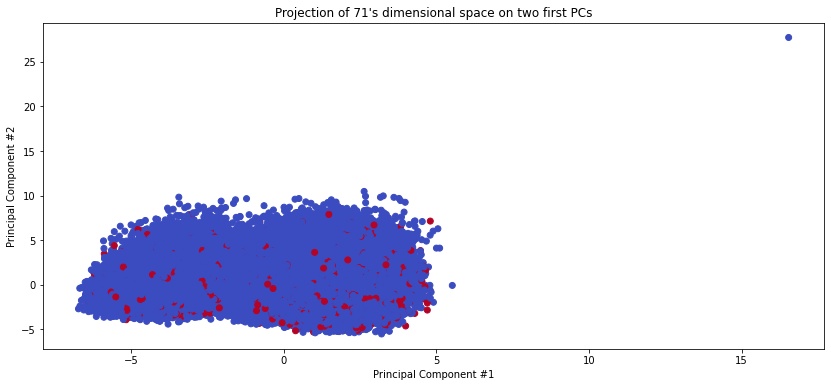

In [120]:
plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm')
plt.title('Projection of 71\'s dimensional space on two first PCs')
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.show()

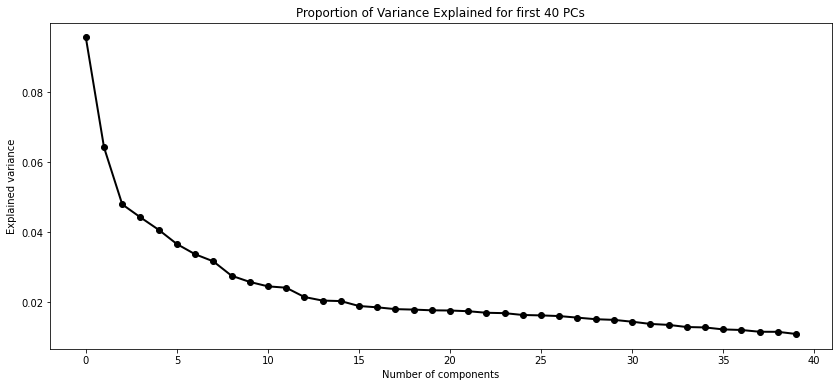

In [121]:
k = 40
plt.figure(figsize=(14, 6))
plt.plot(pca.explained_variance_ratio_[:k], color='k', marker='o', lw=2)
plt.title('Proportion of Variance Explained for first {} PCs'.format(k))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

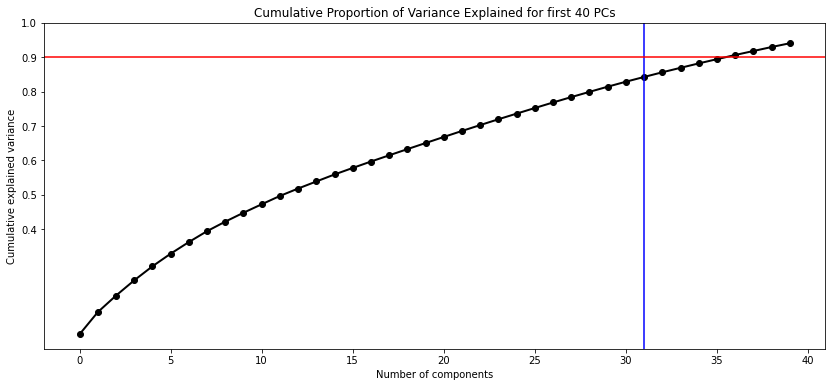

In [122]:
k = 40
plt.figure(figsize=(14, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]), color='k', marker='o', lw=2)
plt.yticks(np.arange(0.4, 1.1, 0.1))
plt.axvline(31, c='b')
plt.axhline(0.9, c='r')
plt.title('Cumulative Proportion of Variance Explained for first {} PCs'.format(k))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [123]:
# What is the minimum number of principal components required 
# to cover the 90% of the variance of the original (scaled) data?
pca = PCA(n_components=0.9, random_state=20)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(210843, 37)

In [124]:
### balanced + PCA
scaler_bal = StandardScaler()
X_scaled_bal = scaler_bal.fit_transform(X_bal)
pca_bal = PCA(n_components=0.9, random_state=20)
X_pca_bal = pca_bal.fit_transform(X_scaled_bal)
X_pca_bal.shape

(33430, 37)

# KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
# test_accuracy = np.empty(len(neighbors))

In [64]:
k = 4

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn_pca = KNeighborsClassifier(n_neighbors=k)
    
#Fit the model
knn.fit(X, y)
knn_pca.fit(X_pca, y)

# train_accuracy[k-1] = knn.score(X, y)

KNeighborsClassifier(n_neighbors=4)

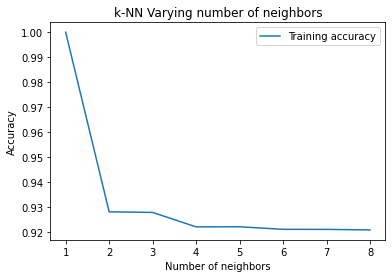

In [65]:
### without PCA ###

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X, y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X, y)
    
#     #Compute accuracy on the test set
#     test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

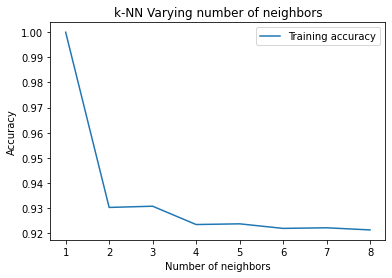

In [110]:
### with PCA ###

train_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_pca, y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_pca, y)
    
#     #Compute accuracy on the test set
#     test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

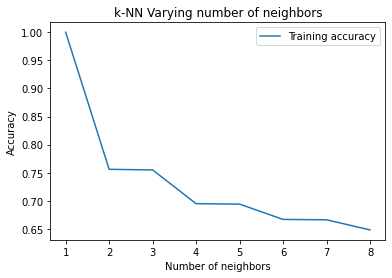

In [126]:
### without PCA on balanced data (equal amounts of 1s and 0s) ###

train_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_bal, y_bal)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_bal, y_bal)
    
#     #Compute accuracy on the test set
#     test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
# plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Logistic Regression

In [72]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
pd.set_option('display.max_colwidth', None)

In [88]:
corr = df.corr().dropna(how='all', axis=1).dropna(how='all')

In [89]:
corr = corr[abs(corr)>0.5]

In [94]:
corr[corr.abs() > 0.5].replace(1, np.nan).dropna(how='all', axis=1)

,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION_CANCELED,INCOME_LOAN_ANNUITY_PCT,AGE_BUCKET
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAME_CONTRACT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.510289,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,NaN,NaN,NaN,0.774829,0.986191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,0.774829,NaN,0.777010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504631,NaN
AMT_GOODS_PRICE,NaN,NaN,0.986191,0.777010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# corr.dropna(how='all', axis=1)

<AxesSubplot:>

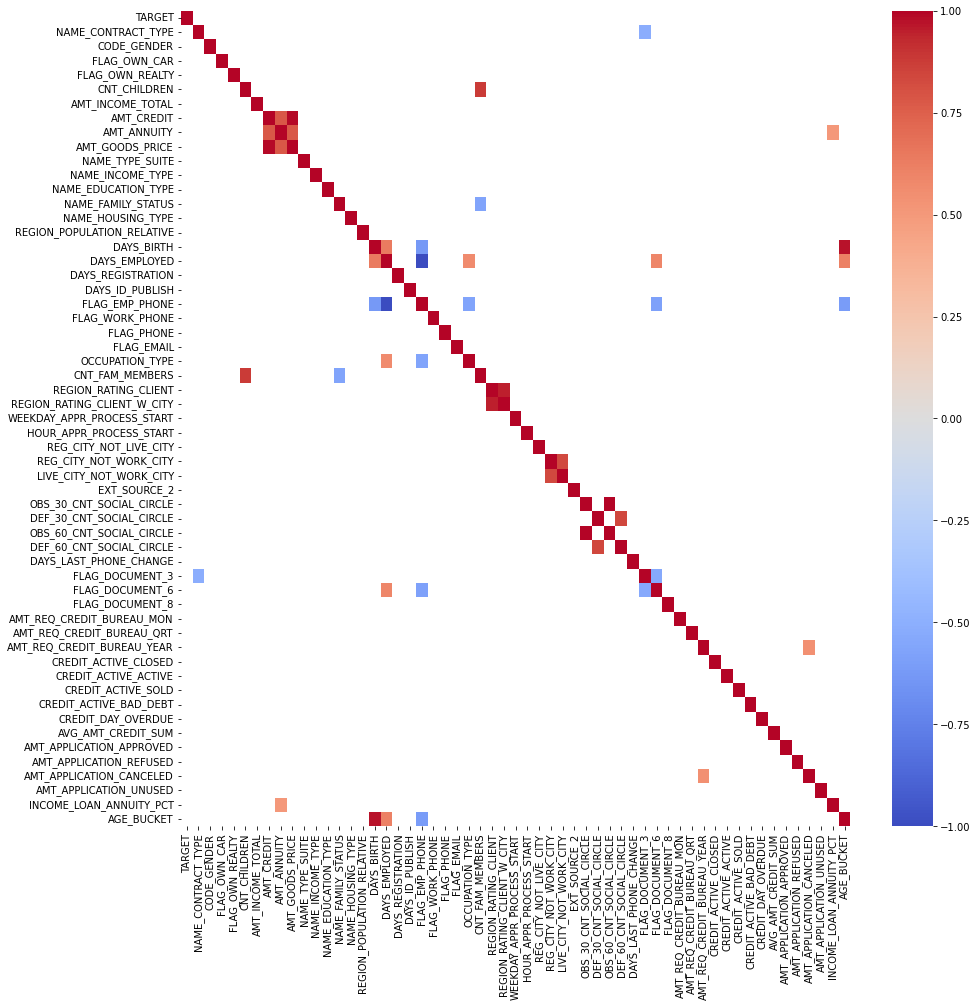

In [93]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=False, fmt=".2f", vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=corr.isnull())

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear", random_state=20).fit(X, y)
logreg_pca = LogisticRegression(solver="liblinear", random_state=20).fit(X_pca, y)
logreg_bal = LogisticRegression(solver="liblinear", random_state=20).fit(X_bal, y_bal)
logreg_pca_bal = LogisticRegression(solver="liblinear", random_state=20).fit(X_pca_bal, y_bal)

logreg_newton = LogisticRegression(solver="newton-cg", random_state=20, max_iter=2000).fit(X, y)
logreg_pca_newton = LogisticRegression(solver="newton-cg", random_state=20, max_iter=2000).fit(X_pca, y)
logreg_bal_newton = LogisticRegression(solver="newton-cg", random_state=20, max_iter=2000).fit(X_bal, y_bal)
logreg_pca_bal_newton = LogisticRegression(solver="newton-cg", random_state=20, max_iter=2000).fit(X_pca_bal, y_bal)

C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\anast\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_linesearch.py:41

In [128]:
logreg_bal.predict(X)
logreg_pca_bal.predict(X_pca)
logreg_bal_newton.predict(X)
logreg_pca_bal_newton.predict(X_pca)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [129]:
logreg_bal.score(X, y)

0.5384622681331607

In [130]:
logreg_pca_bal.score(X_pca, y)

0.4866796621182586

In [132]:
logreg_bal_newton.score(X, y)

0.6789412026958448

In [133]:
logreg_pca_bal_newton.score(X_pca, y)

0.4866938907148921

In [134]:
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import accuracy_score
m = pd.DataFrame()
m['modification'] = ['base', 'PCA', 'balanced', 'balanced + PCA']
m['ROC-AUC_liblinear'] = [roc_auc_score(y, logreg.decision_function(X)), 
                roc_auc_score(y, logreg_pca.decision_function(X_pca)), 
                roc_auc_score(y_bal, logreg_bal.decision_function(X_bal)), 
                roc_auc_score(y_bal, logreg_pca_bal.decision_function(X_pca_bal))]
                              
m['ROC-AUC_newton'] = [roc_auc_score(y, logreg_newton.decision_function(X)), 
                roc_auc_score(y, logreg_pca_newton.decision_function(X_pca)), 
                roc_auc_score(y_bal, logreg_bal_newton.decision_function(X_bal)), 
                roc_auc_score(y_bal, logreg_pca_bal_newton.decision_function(X_pca_bal))]
                              
m['Score_liblinear'] = [logreg.score(X, y), logreg_pca.score(X_pca, y), logreg_bal.score(X_bal, y_bal), 
                       logreg_pca_bal.score(X_pca_bal, y_bal)]
m['Score_newton'] = [logreg_newton.score(X, y), logreg_pca_newton.score(X_pca, y), 
                    logreg_bal_newton.score(X_bal, y_bal), logreg_pca_bal_newton.score(X_pca_bal, y_bal)]

print('Logistic Regression metrics')
m

Logistic Regression metrics


,modification,ROC-AUC_liblinear,ROC-AUC_newton,Score_liblinear,Score_newton
0,base,0.605348,0.516300,0.920718,0.920723
1,PCA,0.711417,0.711417,0.920500,0.920500
2,balanced,0.597816,0.721580,0.572091,0.663087
3,balanced + PCA,0.708307,0.708307,0.653964,0.653964
